In [1]:
from numpy import random, histogram
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
SEED = 100

Define board configuration

In [3]:
odd_notches = [x for x in range(1,10)] # notch positions in odd rows
even_notches = [x for x in range(1,9)] # notch positions even rows
rows = [x for x in range(1,14)]        # rows

In [4]:
for r in rows:
    if r%2 == 1:
        print("\n", end=" ")
        for n in odd_notches:
            print("_ ", end="")
    if r%2 == 0:
        print("\n", end=" ")
        for n in even_notches:
            print(" _", end="")


 _ _ _ _ _ _ _ _ _ 
  _ _ _ _ _ _ _ _
 _ _ _ _ _ _ _ _ _ 
  _ _ _ _ _ _ _ _
 _ _ _ _ _ _ _ _ _ 
  _ _ _ _ _ _ _ _
 _ _ _ _ _ _ _ _ _ 
  _ _ _ _ _ _ _ _
 _ _ _ _ _ _ _ _ _ 
  _ _ _ _ _ _ _ _
 _ _ _ _ _ _ _ _ _ 
  _ _ _ _ _ _ _ _
 _ _ _ _ _ _ _ _ _ 

Define Starting Position

In [5]:
start_pos = 5

In [6]:
def get_next(start, r):
    if r == 13:
        return start
    rand = random.choice([0, 1])
    # Odd Notches
    if r % 2 == 1:
        if start == 1:                  # if at left edge, go right
            nxt = 1
        elif start == max(odd_notches): # if at right edge, go left
            nxt = max(even_notches)
        elif rand == 0:                 # if rand == 0, go left
            nxt = start - 1
        else:                           # if rand == 1, go right
            nxt = start
    # Even Notches
    if r % 2 == 0:
        if rand == 0:                   # if rand == 0, go left
            nxt = start
        else:                           # if rand == 1, go right
            nxt = start + 1
    return get_next(nxt, r + 1)
        

In [7]:
random.seed(SEED)
results = list()
for i in range(0,10000):
    results.append(get_next(start_pos, 1))

Probability Density

In [8]:
probs = histogram(results, density=True, bins=range(1,11))[0]
probs

array([ 0.0172,  0.0573,  0.1231,  0.1962,  0.2188,  0.1901,  0.1203,
        0.0612,  0.0158])

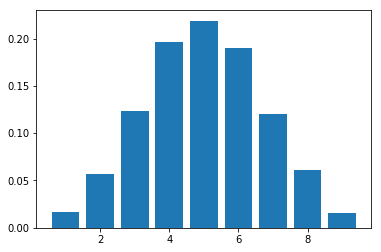

In [9]:
plt.bar(range(1,10), probs)
plt.show()

Expected Value

In [10]:
values = [100, 500, 1000, 0, 10000, 0, 1000, 500, 100]

In [11]:
sum(probs*values)

2493.9499999999998

In [12]:
def simulate(start_pos):
    results = list()
    for i in range(0,10000):
        results.append(get_next(start_pos, 1))
    probs = histogram(results, density=True, bins=range(1,11))[0]
    return {
        "Starting Point": start_pos,
        "probability density": list(probs),
        "Expected Value": sum(probs*values)
    }

In [13]:
random.seed(SEED)
expected = list()
for x in range(1,10):
    s = simulate(x)
    expected.append(s)

In [14]:
pd.DataFrame(expected)[["Starting Point", "Expected Value"]]

,Starting Point,Expected Value
0,1,794.50
1,2,1000.71
2,3,1580.60
3,4,2226.99
4,5,2608.94
5,6,2252.96
6,7,1557.26
7,8,993.46
8,9,756.81
